# Assignment 1

## Guidelines

> Remember to add an explanation of what you do using markdown, and to comment your code. Please *be brief*.
>
> If you re-use a substantial portion of code you find online, e.g on Stackoverflow, you need to add a link to it and make the borrowing explicit. The same applies of you take it and modify it, even substantially. There is nothing bad in doing that, providing you are acknowledging it and make it clear you know what you're doing.
>
> Make sure your notebooks have been run when you sumit, as I won't run them myself. Submit both the `.ipynb` file along with an `.html` export of the same. Submit all necessary auxilliary files as well. Please compress your submission into a `.zip` archive. Only `.zip` files can be submitted.

## Grading policy
> As follows:
>
> * 70 points for correctly completing the assignment.
>
> * 20 points for appropriately writing and organizing your code in terms of structure, readibility (also by humans), comments and minimal documentation. It is important to be concise but also to explain what you did and why, when not obvious.
> 
> * 10 points for doing something extra, e.g., if you go beyond expectations (overall or on something specific). Some ideas for extras might be mentioned in the exercises, or you can come up with your own. You don't need to do them all to get the bonus. The sum of points is 90, doing (some of) the extras can bring you to 100, so the extras are not necessary to get an A.
> 

**The AUC code of conduct applies to this assignment: please only submit your own work.**

---

In [365]:
# Imports
import re
import nltk
import spacy
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import random
import en_core_web_sm #as sp
from matplotlib.ticker import PercentFormatter

# Warm up (25 points)

## Question 1 (2 points)

Explain why `list1` and `list2` behave differently when they are passed to the `append_to_nested_list()` function.

In [366]:
def append_to_nested_list(a_list):
    a_list[0].append("Python")
    return a_list
    
list1 = [[], [], []]
list2 = [[]] * 3
list3 = [] * 3

print(list2)
print(list3)
print(type(list2))
print(append_to_nested_list(list1))
print(append_to_nested_list(list2))

[[], [], []]
[]
<class 'list'>
[['Python'], [], []]
[['Python'], ['Python'], ['Python']]


## Answer Q1

The above function takes a list as an input and appends the string "python" to the first element of that list.

list1 is one list containing three other lists. Therefore, the first element of the input is an empty list which is appended with "python". This return a list with three lists, the first of which contains "python".

list2 is is recognized by the function as three lists, therefore the function appends "python" to the first element of each of these lists.


## Question 2 (3 points)

Write a function that counts the frequency of all words that start and end with the same character (e.g. comic) in a text file and test it on `data/melville-md.txt`. 

Ensure that the words are treated case-insensitive.

In [367]:
# My Code Q2:

def main(text):
    """Input: path to text file (text)
       Output: total number of words that start&end with same letter
       and a dictionary with the frequency for each word with that property"""
    # Global Variables & Opening Textfile
    text = open(text, "r")
    dic = {}
    count = 0 
    
    # Pre-processing
    for line in text:
    # Remove unecessary characters, make everything lowercase
        line = line.strip().lower().translate(line.maketrans("", "", string.punctuation))
        line = re.sub(r'[0-9]+', '', line)
  
    # Tokenize
        words = line.split(" ")
  
        for word in words:
        # Check if the word is already in dictionary
            if word in dic:
                dic[word] += 1
                count += 1
                
            elif word[:1] == word[-1:]:
                dic[word] = 1
                count += 1
                
    # sort word frequency dictionary in increasing order
    sorted_values = sorted(dic.values(), reverse=True)
    sorted_dict = {}
    for i in sorted_values:
        for k in dic.keys():
            if dic[k] == i:
                sorted_dict[k] = dic[k]
                break
                
    text.close()
    return f'total count: {count}',sorted_dict


main("data/melville-md.txt")


('total count: 18785',
 {'a': 4671,
  '': 4068,
  'that': 2918,
  'i': 1845,
  'did': 247,
  'thought': 148,
  'high': 100,
  'dead': 87,
  'sometimes': 86,
  'going': 85,
  'eye': 79,
  'ere': 77,
  'ships': 76,
  'rather': 67,
  'pip': 62,
  'entire': 54,
  'sharks': 48,
  'else': 43,
  'darted': 38,
  'sails': 33,
  'species': 31,
  'stands': 29,
  'giving': 27,
  'sides': 26,
  'stubb’s': 25,
  'gutenberg': 24,
  'escape': 23,
  'descried': 22,
  'rear': 21,
  'died': 20,
  'states': 19,
  'thrust': 17,
  'spouts': 16,
  'disappeared': 15,
  'stars': 14,
  'glancing': 13,
  'dread': 12,
  'scenes': 11,
  'destroyed': 10,
  'heidelburgh': 9,
  'described': 8,
  'shores': 7,
  'l': 6,
  'text': 5,
  'wheelbarrow': 4,
  'schoolmasters': 3,
  'david': 2,
  'h': 1})

## Answer Q2

Sources Used: 
[source](https://www.geeksforgeeks.org/python-count-occurrences-of-each-word-in-given-text-file-using-dictionary/)


## Question 3 (3 points)

Rewrite the following code such that:

- the sequence of fruit names are randomly presented (without replacement). Use a function in the [random](https://docs.python.org/3.7/library/random.html) module for this.


- the article "an" is used when a fruit name begins with a vowel.

In [368]:
# My Code Q3:
available_fruit = ['apple', 'apricot', 'avocado', 'banana', 'bilberry', 'blackberry', 'blackcurrant', 'blueberry', 'boysenberry', 'currant', 'cherry', 'cherimoya', 'cloudberry', 'coconut', 'cranberry', 'cucumber', 'damson', 'date', 'dragonfruit', 'durian', 'elderberry', 'feijoa', 'fig', 'gooseberry', 'grape', 'raisin', 'grapefruit', 'guava', 'honeyberry', 'huckleberry', 'jabuticaba', 'jackfruit', 'jambul', 'jujube', 'kiwano', 'kiwifruit', 'kumquat', 'lemon', 'lime', 'loquat', 'longan', 'lychee', 'mango', 'mangosteen', 'marionberry', 'melon', 'cantaloupe', 'honeydew', 'watermelon', 'mulberry', 'nectarine', 'nance', 'orange', 'clementine', 'mandarine', 'tangerine', 'papaya', 'passionfruit', 'peach', 'pear', 'persimmon', 'physalis', 'plantain', 'plum', 'prune', 'pineapple', 'plumcot', 'pomegranate', 'pomelo', 'quince', 'raspberry', 'salmonberry', 'rambutan', 'redcurrant', 'salak', 'satsuma', 'soursop', 'strawberry', 'tamarillo', 'tamarind', 'yuzu']
random.shuffle(available_fruit)
for fruit in available_fruit:
    if fruit[:1] in "aeiou":
        print(f"We have an {fruit}")
    else:
        print(f"We have a {fruit}")

We have a currant
We have a grape
We have a pineapple
We have a cherimoya
We have a jambul
We have a jabuticaba
We have a damson
We have a raisin
We have a salak
We have a grapefruit
We have a plum
We have a loquat
We have a pomelo
We have a lemon
We have a cucumber
We have a plantain
We have a nectarine
We have a feijoa
We have a mango
We have a papaya
We have a blackcurrant
We have an apricot
We have a mandarine
We have a gooseberry
We have a mangosteen
We have a persimmon
We have a marionberry
We have a watermelon
We have a physalis
We have a cherry
We have a rambutan
We have a honeydew
We have a satsuma
We have a coconut
We have a fig
We have a yuzu
We have an orange
We have a melon
We have a blackberry
We have a passionfruit
We have a cranberry
We have a honeyberry
We have a boysenberry
We have a plumcot
We have a banana
We have a kumquat
We have a salmonberry
We have a lychee
We have a kiwano
We have a lime
We have a tamarillo
We have a kiwifruit
We have a dragonfruit
We have a j

## Question 4 (7 points)

The following code has been written to extract all word-initial consonant clusters in a text (e.g. "br" in "bread). Each sequence is obtained by matching any sequence of letters that does not include 'aeiou' and that occurs after a whitespace or the start of the line and that consists of 2 or more such characters.

It works by reading an input file line by line, and finding all matches of a regular expression in this line (case insensitive).

Unfortunately, the method only counts, and we do not find out which word-initial consonants are present in the text. Can you find a way to save all matching consonant clusters to the dictionary named "consonantclusters" with their frequency as the value, and then print this dictionary? Note that there can be multiple results per line. Try to avoid capturing the space(s) before the consonant cluster also.

**Possible extra:** Print the consonant clusters sorted by frequency and in a nice looking way.

In [59]:
import codecs
import re

In [369]:
# My Code Q4:

def consonant(text):
    """Input: path to text file (text)
       Output: total number of words that have a word-initial consonant cluster of length 2 or longer
       and a dictionary with the frequency for each word with that property in increasing order"""
    dic = {}
    count = 0
    with codecs.open(text, "r", encoding="utf8") as text:
        
    #Pre-processing
        for line in text:
    # Removes unecessary characters & lowercases everything
            line = line.strip().lower().translate(line.maketrans("", "", string.punctuation))
            line = re.sub(r'[0-9]+', '', line)
  
    # Tokenize
            words = line.split(" ")

            for word in words:
                word = word.replace("a", "").replace("e", "").replace("i", "").replace("o", "").replace("u", "")
                if word in dic:
                    dic[word] += 1
                    count += 1
                elif re.match(r'(^|\s)(?:(?![aeiouy])[a-z]){2,}', word):
                    dic[word] = 1  
                    count += 1
        #count += len(result)

    # sort cluster frequency dictionary in increasing order
    sorted_values = sorted(dic.values(), reverse=True)
    sorted_dict = {}
    for i in sorted_values:
        for k in dic.keys():
            if dic[k] == i:
                sorted_dict[k] = dic[k]
                break
    return "total count:", count, sorted_dict

consonant("data/melville-md.txt")

('total count:',
 162582,
 {'th': 14906,
  'nd': 6533,
  'tht': 2924,
  'hs': 2848,
  'bt': 2353,
  'ths': 2238,
  'fr': 2054,
  'thr': 2031,
  'wth': 1764,
  'nt': 1690,
  'ws': 1652,
  'll': 1484,
  'whl': 1321,
  'frm': 1169,
  'hm': 1083,
  'hd': 1075,
  'thn': 938,
  'sm': 919,
  'nw': 822,
  'hv': 783,
  'thy': 766,
  'lk': 763,
  'wht': 745,
  'mn': 728,
  'wr': 718,
  'hr': 714,
  'pn': 659,
  'whch': 644,
  'mst': 612,
  'wll': 607,
  'mr': 597,
  'vr': 594,
  'whn': 593,
  'vry': 590,
  'sd': 570,
  'ld': 529,
  'wld': 511,
  'thm': 458,
  'bn': 455,
  'lng': 426,
  'hb': 410,
  'lst': 406,
  'sn': 394,
  'shp': 393,
  'ts': 391,
  'dd': 378,
  'sch': 373,
  'nly': 370,
  'dwn': 366,
  'tm': 331,
  'wh': 329,
  'gn': 322,
  'chptr': 308,
  'stll': 307,
  'gd': 305,
  'grt': 303,
  'bfr': 294,
  'tw': 291,
  'cm': 288,
  'rnd': 286,
  'ftr': 285,
  'smd': 281,
  'cptn': 280,
  'tll': 269,
  'whls': 268,
  'cld': 263,
  'lttl': 248,
  'sprm': 246,
  'md': 243,
  'frst': 242,
  

In [70]:
# Question Code
consonantclusters = {}
consonantclustercount = 0
with codecs.open("data/melville-md.txt", "r", encoding="utf8") as infile:
    consonantclusterregex = re.compile(r'(^|\s)(?:(?![aeiouy])[a-z]){2,}')
    for line in infile:
        result = consonantclusterregex.findall(line.lower())
        if result:
            consonantclustercount += len(result)
print(consonantclustercount)

51523


## Answer Q4:

Sources used:
[sort dictionary](https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/)

## Question 5 (10 points)

Please use the frequencies in `late_arrival_causes` to create a duplicate of the plot below, as close as possible. This is called a Pareto chart.

Note: the line plot above the bars shows the cumulative frequency.

**Possible extra:** suggest, motivate and implement an alternative visualization for the same data.

![pareto chart](images/pareto-chart.png)

In [149]:
late_arrival_causes = {"Child Care" : 44, "Emergency" : 7, "Overslept" : 11, "Traffic" : 56, "Transp." : 27, "Weather" : 20}

            value     cumperc
Traffic        56   33.939394
Child Care     44   60.606061
Transp.        27   76.969697
Weather        20   89.090909
Overslept      11   95.757576
Emergency       7  100.000000


Text(0.5, 1.0, 'Pareto Chart - Late Arrivals by Reported Cause')

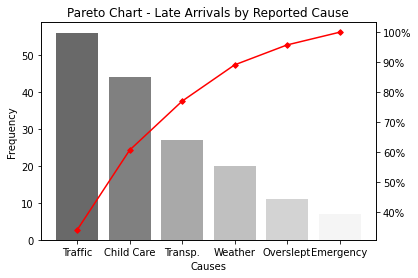

In [370]:
# creates dataframe from dictionary
df = pd.DataFrame.from_dict(late_arrival_causes, orient='index') 
# names colum value
df.columns = ["value"]

# sorts by decreasing order
df = df.sort_values(by='value', ascending=False)
# calculates cumilative percentage and adds it as column
df['cumperc'] = df['value'].cumsum()/df['value'].sum()*100
print(df)

#make plot
fig, ax = plt.subplots()
ax.bar(df.index, df['value'], color=["dimgrey","grey","darkgrey","silver", "lightgrey", "whitesmoke"])

#makes line of cumilative percentage
ax2 = ax.twinx()
ax2.plot(df.index, df['cumperc'], color="red", marker="D", ms=4)
ax2.yaxis.set_major_formatter(PercentFormatter())

#labels graph
ax.set_xlabel("Causes")
ax.set_ylabel("Frequency")
ax.set_title("Pareto Chart - Late Arrivals by Reported Cause")


## Answer Q5:

The y-axis has two different labels: on the left there is the frequency in terms of number of occurences, and on the right there is the cummulative frequency in terms of percentage. The bars correspond to the left y-axis scaling and the line corresponds to the right y-axis scaling. For example the second point of the red line is at 62.5% percent, as (traffic frequency + child care frequency) / (total number of occurences) 

= 

(56 + 44) / 160 = 0.625


Sources Used: 
[source](https://www.statology.org/pareto-chart-python/)

---

# Preprocessing pipelines (40 points)

## Question 6 (25 points)

- Download a 19th-century edition (or earlier, but not later!) of a book you like from the [Internet Archive](https://archive.org) in `.txt` format. For example, [Frankenstein](https://archive.org/details/ghostseer01schiuoft/page/n6). Add the link to the edition you used to your answer, as well as the `.txt` file to your submission.

- Write code that:

    1. Reads the text in memory.
    
    1. Pre-processes the text with a tokenizer from [NLTK](https://www.nltk.org/api/nltk.tokenize.html) (remember to motivate your choice).
    
    1. Filter out words that consist of strictly less than 4 alphabetic characters.

    1. Counts the frequencies of all the words in the corpus (words should be counted case-insensitive).

    1. Writes each word-frequency pair to a csv file (from most frequent to rarest).

*Briefly* comment on your results, especially looking at very frequent and very unfrequent words. What is problematic about these old editions? Can you find some limitations of the tokenizer in use, and think about how you would improve on it?

**Possible extra:** plot the relative frequency of the top N words (e.g., use the Pareto chart you did above, or another suitable plot) and discuss whether the distribution might follow the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law).

**Possible extra:** add lemmatization or stemming and part-of-speech tagging.

In [371]:
# My Code Q6:
from nltk.tokenize import word_tokenize

def wordfreq(inpf, outf):
    """Input: path to text file (text)
       Output: total number of words with 4 or more alphabetic character 
       and .txt file number of occurences of each word with that property"""
    text = open(inpf, "r")
    dic = {}
    count = 0 

    for line in text:
    # Preprocessing: Remove unecessary character
        line = line.strip().lower().translate(line.maketrans("", "", string.punctuation))
        line = re.sub(r'[0-9]+', '', line)
  
    # Tokenize
        words = word_tokenize(line)
  

        for word in words:
        # Check if the word is already in dictionary
            if word in dic:
                dic[word] += 1
                count += 1
                
            # Counts only alphabetic words that are 4 or more characters long           
            elif re.match(r'([a-z]){4}', word):
                dic[word] = 1
                count += 1
            
    
    # sort cluster frequency dictionary in increasing order
    sorted_values = sorted(dic.values(), reverse=True)
    sorted_dict = {}
    for i in sorted_values:
        for k in dic.keys():
            if dic[k] == i:
                sorted_dict[k] = dic[k]
                break
                
    # Output csv file
    with open(outf, "w") as outfile:
        for key in sorted_dict.keys():
            outfile.write("%s,%s\n"%(key,dic[key]))
            
    text.close()
    
    return "total count:", count, sorted_dict

wordfreq("frankenstein.txt","out.txt")

('total count:',
 76780,
 {'that': 2001,
  'with': 1282,
  'which': 1214,
  'this': 880,
  'from': 790,
  'have': 753,
  'were': 541,
  'when': 488,
  'prince': 463,
  'your': 425,
  'they': 408,
  'will': 398,
  'upon': 386,
  'could': 373,
  'what': 356,
  'would': 353,
  'been': 351,
  'more': 321,
  'said': 289,
  'their': 276,
  'some': 268,
  'time': 267,
  'them': 261,
  'every': 254,
  'should': 253,
  'into': 252,
  'very': 245,
  'before': 227,
  'than': 217,
  'only': 211,
  'these': 208,
  'such': 195,
  'there': 190,
  'must': 187,
  'might': 184,
  'most': 182,
  'then': 178,
  'first': 174,
  'life': 173,
  'being': 171,
  'after': 169,
  'made': 161,
  'himself': 160,
  'eyes': 158,
  'shall': 156,
  'found': 155,
  'even': 152,
  'soon': 149,
  'great': 148,
  'mind': 147,
  'ghostseer': 144,
  'where': 141,
  'those': 139,
  'thought': 129,
  'also': 128,
  'father': 127,
  'many': 126,
  'frankenstein': 125,
  'night': 124,
  'heard': 123,
  'ever': 122,
  'heart': 1

225


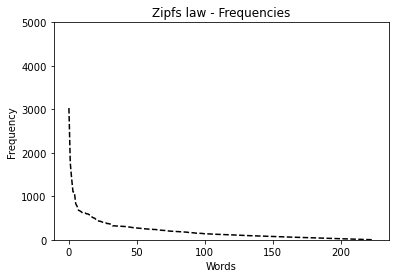

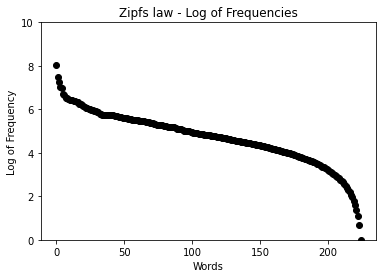

In [375]:
# Zipf's Law

# getting dictionary from function output
dict = wordfreq("data/melville-md.txt", "out.txt")[2]

# getting frequency values in list from dictionary
freq = list(dict.values())
logfreq = np.log(list(dict.values()))


# Plotting Frequencies
plt.title('Zipfs law - Frequencies', fontsize=12)
plt.xlabel("Words")
plt.ylabel("Frequency")
points = range(0,len(freq))
plt.plot(points, freq, '--', color='black')
plt.ylim(0, 5000)
plt.show()

# Plotting Log of Frequencies
plt.title('Zipfs law - Log of Frequencies', fontsize=12)
plt.xlabel("Words")
plt.ylabel("Log of Frequency")
points = range(0,len(freq))
plt.plot(points, logfreq, 'o', color='black')
plt.ylim(0, 10)
plt.show()


## Answer Q6:

I interpreted the question as wanting only the number of occurences of all words with the property of haing 4 or more alphabetic characters.




Zipf's Law:
I graphed this with both the log of frequencies and normal frequencies.
The normal graph follows the power law (aka Pareto distribution) which means that the frequency of the words varies inversely as a power of that value.

Sources Used: 

[book](https://archive.org/details/ghostseer01schiuoft/page/n6/mode/2up)

[csv writer](https://www.tutorialspoint.com/How-to-save-a-Python-Dictionary-to-CSV-file)



## Question 7 (15 points)

Do some self-learning: implement the same pipeline of question 6 using [spaCy pipelines](https://spacy.io/usage/processing-pipelines).

In [376]:
# My Code Q7:

from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
sp = spacy.load('en_core_web_sm')

def main(inpf,outf):
    file = open(inpf, "r")
    text = file.read()
    text = text.lower()
    tokenizer = nlp.tokenizer
    tokens = tokenizer(text)
    dic = {}
    count = 0
    
    for token in tokens:
        #print(token, "!")
        # Check if the word is already in dictionary
        if token in dic:
            # Increment count of word by 1
            dic[word] += 1
            count += 1
        
        # Counts only alphabetic words that are 4 or more characters long  
        elif (len(token) >= 4 and token.is_alpha == True): 
            dic[token] = 1
            count += 1         
    
    # sort cluster frequency dictionary in increasing order
    sorted_values = sorted(dic.values(), reverse=True)
    sorted_dict = {}
    for i in sorted_values:
        for k in dic.keys():
            if dic[k] == i:
                sorted_dict[k] = dic[k]
                break

        # Output csv file
    with open(outf, "w") as outfile:
        for key in sorted_dict.keys():
            outfile.write("%s,%s\n"%(key,dic[key]))
            
    file.close()
    
    return "total count:", count, dic, sorted_dict

main("frankenstein.txt","out1.txt")     


('total count:',
 76384,
 {presented: 1,
  library: 1,
  university: 1,
  toronto: 1,
  andrew: 1,
  kellogg: 1,
  frankenstein: 1,
  masot: 1,
  seen: 1,
  iervatic: 1,
  introduction: 1,
  would: 1,
  speak: 1,
  mysterious: 1,
  fears: 1,
  nature: 1,
  awaken: 1,
  thrilling: 1,
  horror: 1,
  make: 1,
  reader: 1,
  dread: 1,
  look: 1,
  round: 1,
  curdle: 1,
  blood: 1,
  quicken: 1,
  beatings: 1,
  heart: 1,
  accomplish: 1,
  these: 1,
  things: 1,
  ghost: 1,
  story: 1,
  would: 1,
  unworthy: 1,
  name: 1,
  thought: 1,
  pondered: 1,
  vainly: 1,
  felt: 1,
  that: 1,
  blank: 1,
  incapability: 1,
  invention: 1,
  which: 1,
  greatest: 1,
  misery: 1,
  authorship: 1,
  when: 1,
  dull: 1,
  nothing: 1,
  replies: 1,
  anxious: 1,
  invocations: 1,
  have: 1,
  thought: 1,
  story: 1,
  asked: 1,
  each: 1,
  morning: 1,
  each: 1,
  morning: 1,
  forced: 1,
  reply: 1,
  with: 1,
  mortifying: 1,
  negative: 1,
  every: 1,
  thing: 1,
  must: 1,
  have: 1,
  beginning

---

# Text similarity (25 points)

## Question 8 (25 points)

The **Levenshtein Distance** (see [Wikipedia](https://en.wikipedia.org/wiki/Levenshtein_distance) and J&M, Ch. 2.5) calculates the distance between two strings as the number of deletions, insertions, or substitutions required to transform one into the other. This is also called edit distance. **Write a reasonably efficient function to calculate this metric**.

Examples: 

* `levenshtein(" Hello ", "hello")` returns 3 (case sensitive)
* `levenshtein("aeiou", "aeiouuu")` returns 2

Remarks:

- **Important:** a (naive) recursive implementation is going to be very slow, so one way to ensure the function is efficient is by making it *iterative*. That said, there are also ways to speed up a recursive implementation. In the end, how you implement it is up to you, as long as it works.


- The Wikipedia article discusses the difference between a (slow) recursive strategy and a (fast) iterative one.


- Test your function with `%timeit` on two words with a high distance, e.g. "levenshteindistance" vs. "ecnatsidniethsnevel". If your function takes seconds to compute the distance, it's too slow. A moderately fast iterative function finishes in 100-200 ns on my computer.


- This exercise only consists of writing a single function, so the threshold for **code originality** is higher here than in other exercises. The code for this exercise must be your own. If I find the code submitted to this exercise somewhere online (even with small changes like new variable names) it will be graded 0 points. Submitting a slow function that you wrote yourself is better than submitting a fast, but copied function.


- Carefully comment your code in order to explain what your function is doing. **In this case, uncommented code will not be graded at all**.

In [364]:
# My Code Q8:

import pandas as pd

def printDistances(matrix, s1Length, s2Length):
    """Input: takes distance matrix, and length of both strings
       Output: prints filled out distance matrix"""
    for t1 in range(s1Length + 1):
        for t2 in range(s2Length + 1):
            print(int(matrix[t1][t2]), end=" ")
        print()

def levenshtein(s1, s2):
    """Input: 2 strings
       Output: levenshtein distance between two strings"""
    
    # make matrix with zeros
    matrix = np.zeros((len(s1) + 1, len(s2) + 1))
    
    # make row and column labeled 1,2,3,.., index of last character
    for c1 in range(len(s1) + 1):
        matrix[c1][0] = c1

    for c2 in range(len(s2) + 1):
        matrix[0][c2] = c2
    
    a = 0
    b = 0
    c = 0
    
    # for each character in both strings             
    for c1 in range(1, len(s1) + 1):
        for c2 in range(1, len(s2) + 1):
    # if characters in same position are equal then distance in current matrix position
    # is equal to the upper left diagonal distance next to current position
    # -1 because it is indexed with zero but starting range in for loop is 1
            if (s1[c1-1] == s2[c2-1]):
                matrix[c1][c2] = matrix[c1 - 1][c2 - 1]
            else:
                # defining the positions a,b,c around the current position
                a = matrix[c1][c2 - 1]
                b = matrix[c1 - 1][c2]
                c = matrix[c1 - 1][c2 - 1]
                
                if (a <= b and a <= c):
                    matrix[c1][c2] = a + 1
                elif (b <= a and b <= c):
                    matrix[c1][c2] = b + 1
                else:
                    matrix[c1][c2] = c + 1
                    
    printDistances(matrix, len(s1), len(s2))
    return matrix[len(s1)][len(s2)]

levenshtein("wordswords", "nevernever")

0 1 2 3 4 5 6 7 8 9 10 
1 1 2 3 4 5 6 7 8 9 10 
2 2 2 3 4 5 6 7 8 9 10 
3 3 3 3 4 4 5 6 7 8 9 
4 4 4 4 4 5 5 6 7 8 9 
5 5 5 5 5 5 6 6 7 8 9 
6 6 6 6 6 6 6 7 7 8 9 
7 7 7 7 7 7 7 7 8 8 9 
8 8 8 8 8 7 8 8 8 9 8 
9 9 9 9 9 8 8 9 9 9 9 
10 10 10 10 10 9 9 9 10 10 10 


10.0


Sources:
https://blog.paperspace.com/implementing-levenshtein-distance-word-autocomplete-autocorrect/


In [360]:
%%timeit
levenshtein("wordswords", "nevernever")

115 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
